In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import os
import warnings
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:


def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [2]:
series = pd.read_csv('Cleaned_Data.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


In [3]:
series.head()

,InvoiceDate,Total_Price,year,month,day,week,weekday,dayofyear
2010-12-01,2010-12-01,58635.56,2010,12,1,48,2,335
2010-12-02,2010-12-02,46207.28,2010,12,2,48,3,336
2010-12-03,2010-12-03,45620.46,2010,12,3,48,4,337
2010-12-04,2010-12-04,0.00,2010,12,4,48,5,338
2010-12-05,2010-12-05,31383.95,2010,12,5,48,6,339


In [4]:
train_size = int(len(series.Total_Price)*0.8 )
train, test = series.Total_Price[0:train_size], series.Total_Price[train_size:]

In [5]:
series.drop('InvoiceDate', axis =1)

,Total_Price,year,month,day,week,weekday,dayofyear
2010-12-01,58635.56,2010,12,1,48,2,335
2010-12-02,46207.28,2010,12,2,48,3,336
2010-12-03,45620.46,2010,12,3,48,4,337
2010-12-04,0.00,2010,12,4,48,5,338
2010-12-05,31383.95,2010,12,5,48,6,339
...,...,...,...,...,...,...,...
2011-12-05,57751.32,2011,12,5,49,0,339
2011-12-06,54228.37,2011,12,6,49,1,340
2011-12-07,75076.22,2011,12,7,49,2,341
2011-12-08,81417.78,2011,12,8,49,3,342


In [6]:
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
#warnings.filterwarnings("ignore")
#evaluate_models(series.Total_Price, p_values, d_values, q_values)

In [3]:
df2 = series.Total_Price
df3 = pd.concat([df2,df2.shift(1)], axis =1)
df3

,Total_Price,Total_Price
2010-12-01,58635.56,NaN
2010-12-02,46207.28,58635.56
2010-12-03,45620.46,46207.28
2010-12-04,0.00,45620.46
2010-12-05,31383.95,0.00
...,...,...
2011-12-05,57751.32,24565.78
2011-12-06,54228.37,57751.32
2011-12-07,75076.22,54228.37
2011-12-08,81417.78,75076.22


In [8]:
df3.columns = ['Actual_Sales', 'Predicted_Sales']
df3

,Actual_Sales,Predicted_Sales
2010-12-01,58635.56,NaN
2010-12-02,46207.28,58635.56
2010-12-03,45620.46,46207.28
2010-12-04,0.00,45620.46
2010-12-05,31383.95,0.00
...,...,...
2011-12-05,57751.32,24565.78
2011-12-06,54228.37,57751.32
2011-12-07,75076.22,54228.37
2011-12-08,81417.78,75076.22


In [9]:
df4 = df3.dropna(inplace=True)

In [10]:
df3_error = mean_squared_error(df3.Actual_Sales,df3.Predicted_Sales)
df3_error

456501124.64855015

In [11]:
np.sqrt(df3_error)

21365.88693802694

In [4]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(series.Total_Price, order=(10,1,2))
model_fit=model.fit()
model_fit.summary()

C:\Users\batka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\batka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Total_Price   No. Observations:                  373
Model:                ARIMA(10, 1, 2)   Log Likelihood               -4058.671
Method:                       css-mle   S.D. of innovations          12725.749
Date:                Fri, 07 May 2021   AIC                           8145.342
Time:                        18:01:11   BIC                           8200.244
Sample:                    12-02-2010   HQIC                          8167.143
                         - 12-09-2011                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   28.5767    178.196      0.160      0.873    -320.680     377.834
ar.L1.D.Total_Price      0.4133      0.055      7.537      0.000       0.306       0.521
ar.L2.D.Total_Price     -0.7743      0.058    -13.462      0.000      -0.887      -0.662
ar.L3.D.Total_Price     -0.3888      0.068     -5.709      0.000      -0.522      -0.255
ar.L4.D.Total_Price     -0.4450      0.068     -6.504      0.000      -0.579      -0.311
ar.L5.D.Total_Price     -0.3949      0.071     -5.580      0.000      -0.534      -0.256
ar.L6.D.Total_Price     -0.2531      0.071     -3.579      0.000      -0.392      -0.114
ar.L7.D.Total_Price      0.2236      0.068      3.269      0.001       0.090       0.358
ar.L8.D.Total_Price     -0.4141      0.068     -6.051      0.000      -0.548      -0.280
ar.L9.D.Total_Price      0.1273      0.057      2.222      0.026       0.015       0.240
ar.L10.D.Total_Price     0.0545      0.055      0.998      0.318      -0.053       0.162
ma.L1.D.Total_Price     -1.1997      0.020    -60.262      0.000      -1.239      -1.161
ma.L2.D.Total_Price      0.9671      0.021     45.723      0.000       0.926       1.009
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0167           -0.5065j            1.1359           -0.4264
AR.2            -1.0167           +0.5065j            1.1359            0.4264
AR.3            -0.2396           -1.0412j            1.0684           -0.2860
AR.4            -0.2396           +1.0412j            1.0684            0.2860
AR.5             0.6238           -0.7823j            1.0005           -0.1429
AR.6             0.6238           +0.7823j            1.0005            0.1429
AR.7             0.6410           -1.0139j            1.1995           -0.1603
AR.8             0.6410           +1.0139j            1.1995            0.1603
AR.9             1.9912           -0.0000j            1.9912           -0.0000
AR.10           -4.3435           -0.0000j            4.3435           -0.5000
MA.1             0.6203           -0.8058j            1.0169           -0.1456
MA.2             0.6203           +0.8058j            1.0169            0.1456
------------------------------------------------------------------------------
"""

In [13]:
#series['forecast']=model_fit.predict(start=350,end=370,dynamic=True)
#series[['Total_Price','forecast']].plot(figsize=(12,8))

In [18]:
rms = np.sqrt(mean_squared_error(test,forecast))
print(rms)

NameError: name 'forecast' is not defined

C:\Users\batka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\batka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\batka\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


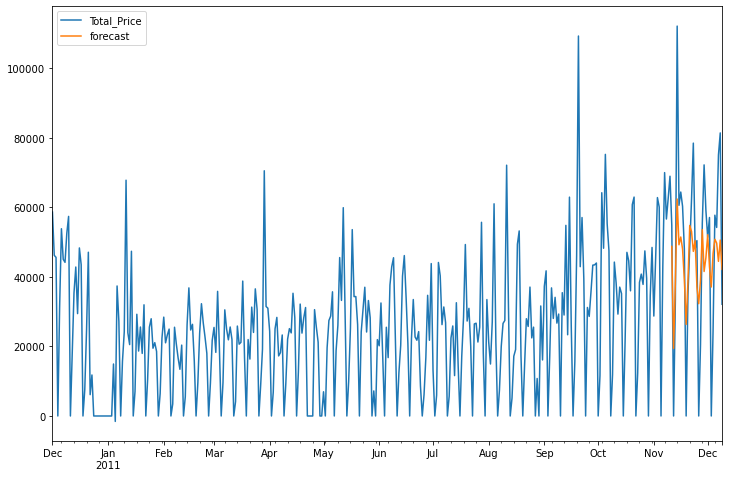

In [19]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(series['Total_Price'],order=(10, 1, 2),seasonal_order=(1,1,1,12))
results=model.fit()
series['forecast']=results.predict(start=345,end=389,dynamic=True)
series[['Total_Price','forecast']].plot(figsize=(12,8))

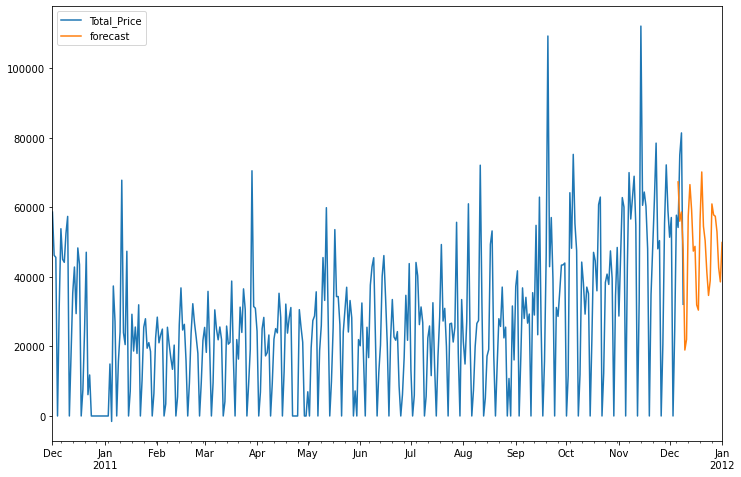

In [13]:
from pandas.tseries.offsets import DateOffset
future_dates=[series.index[-1]+ DateOffset(days=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=series.columns)

future_datest_df.tail()

future_df=pd.concat([series,future_datest_df])

future_df['forecast'] = results.predict(start = 370, end = 420, dynamic= True)
future_df[['Total_Price', 'forecast']].plot(figsize=(12, 8))

In [5]:
from sklearn.model_selection import TimeSeriesSplit

In [6]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(series.Total_Price)

(0.01212834766106136, False)

In [7]:
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(series.Total_Price):
     print("TRAIN:", train_index, "TEST:", test_index)

     #To get the indices 
     X_train, X_test = series.Total_Price[train_index], series.Total_Price[test_index]


TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63] TEST: [ 64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125] TEST: [126 127 128 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[92] intercept   : AIC=inf, Time=29.98 sec
 ARIMA(0,1,0)(0,0,0)[92] intercept   : AIC=7033.927, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[92] intercept   : AIC=7015.805, Time=3.12 sec
 ARIMA(0,1,1)(0,0,1)[92] intercept   : AIC=6941.600, Time=5.42 sec
 ARIMA(0,1,0)(0,0,0)[92]             : AIC=7031.958, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[92] intercept   : AIC=6948.325, Time=0.06 sec
 ARIMA(0,1,1)(1,0,1)[92] intercept   : AIC=6943.600, Time=7.25 sec
 ARIMA(0,1,1)(0,0,2)[92] intercept   : AIC=6943.600, Time=37.99 sec
 ARIMA(0,1,1)(1,0,0)[92] intercept   : AIC=6942.189, Time=4.73 sec
 ARIMA(0,1,1)(1,0,2)[92] intercept   : AIC=inf, Time=93.41 sec
 ARIMA(0,1,0)(0,0,1)[92] intercept   : AIC=7035.515, Time=2.86 sec
 ARIMA(1,1,1)(0,0,1)[92] intercept   : AIC=inf, Time=4.64 sec
 ARIMA(0,1,2)(0,0,1)[92] intercept   : AIC=6911.859, Time=18.26 sec
 ARIMA(0,1,2)(0,0,0)[92] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,2)(1,0,1)[92] intercept 

<ipython-input-8-9b78bd437197>:14: MatplotlibDeprecationWarning: Unrecognized location 'Left corner'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc = 'Left corner')


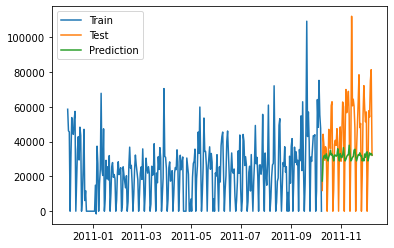

In [8]:
#building the model
from pmdarima import auto_arima
model = auto_arima(X_train, supress_warnings=True, trace=True, m=92,
                   error_action='ignore')
model.fit(X_train)

forecast = model.predict(n_periods=len(X_test))
forecast = pd.DataFrame(forecast,index = X_test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(X_train, label='Train')
plt.plot(X_test, label='Test')
plt.plot(forecast, label='Prediction')
plt.legend(loc = 'Left corner')
plt.show()

In [24]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(X_test,forecast))
print(rms)

25833.4431039166


In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  312
Model:             SARIMAX(0, 1, 2)x(1, 0, [], 92)   Log Likelihood               -3451.285
Date:                             Sun, 11 Apr 2021   AIC                           6910.570
Time:                                     11:30:08   BIC                           6925.529
Sample:                                          0   HQIC                          6916.550
                                             - 312                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6465      0.061    -10.558      0.000      -0.767      -0.526
ma.L2         -0.3109      0.060     -5.187      0.000      -0.428      -0.193
ar.S.L92       0.1253      0.084      1.496      0.135      -0.039       0.289
sigma2      2.475e+08    9.6e-11   2.58e+18      0.000    2.48e+08    2.48e+08
===================================================================================
Ljung-Box (Q):                      393.54   Jarque-Bera (JB):                54.89
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.64   Skew:                             0.54
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.4e+34. Standard errors may be unstable.
"""

In [19]:
forecast

,Prediction
2011-09-26,59297.049780
2011-09-27,65429.192476
2011-09-28,57426.997870
2011-09-29,47904.424079
2011-09-30,27715.801156
...,...
2011-12-05,51865.382536
2011-12-06,57914.729489
2011-12-07,52640.806135
2011-12-08,40178.153178


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print(mean_squared_error(X_test, forecast))
print(r2_score(X_test, forecast))

667366782.6032962
-0.19728854830464382
